In [8]:
import pandas as pd

# Load the first file
eeg_data_1 = pd.read_csv('profile\\Subhodeep\\eeg_data_20230705142209.csv')

# Display the first few rows
eeg_data_1.head()


,COUNTER,INTERPOLATED,Cz,Fz,Fp1,F7,F3,FC1,C3,FC5,...,F4,F8,Fp2,HighBitFlex,SaturationFlag,RAW_CQ,MARKER_HARDWARE,MARKERS,Human Readable Time,New Label
0,105,0,-20.447,-31.897,-72.696,-104.488,-19.020,-34.475,-25.280,-15.277,...,-25.310,-50.113,-193.218,3968.0,0.0,0.0,0,1.688560e+09,2023-07-05 14:22:09,Rest
1,106,0,-17.353,-27.254,-64.938,-94.650,-17.464,-29.830,-19.619,-18.847,...,-21.187,-44.427,-183.291,3968.0,0.0,0.0,0,1.688560e+09,2023-07-05 14:22:09,Rest
2,107,0,-24.508,-38.498,-72.046,-99.166,-32.304,-34.923,-28.309,-26.513,...,-12.969,-46.944,-186.694,3968.0,0.0,0.0,0,1.688560e+09,2023-07-05 14:22:09,Rest
3,108,0,-30.119,-44.095,-82.220,-114.948,-30.734,-43.085,-36.477,-26.487,...,-18.079,-47.410,-196.753,3968.0,0.0,0.0,0,1.688560e+09,2023-07-05 14:22:09,Rest
4,109,0,-32.650,-41.489,-74.965,-106.124,-21.994,-44.579,-29.781,-28.509,...,-26.770,-47.362,-194.507,3968.0,0.0,0.0,0,1.688560e+09,2023-07-05 14:22:09,Rest


In [9]:
# Load the remaining EEG data files
eeg_data_2 = pd.read_csv('profile\\Subhodeep\\eeg_data_20230705142827.csv')
eeg_data_3 = pd.read_csv('profile\\Subhodeep\\eeg_data_20230705143714.csv')

# Load the hybrid data files
hybrid_data_1 = pd.read_csv('profile\\Subhodeep\\hybrid_data_20230804164650.csv')
hybrid_data_2 = pd.read_csv('profile\\Subhodeep\\hybrid_data_20230804165122.csv')


# Concatenate the EEG data files
eeg_data_combined = pd.concat([eeg_data_1, eeg_data_2, eeg_data_3], ignore_index=True)

# Concatenate the hybrid data files
hybrid_data_combined = pd.concat([hybrid_data_1, hybrid_data_2], ignore_index=True)

# Check the shape of the combined datasets
eeg_data_combined.shape, hybrid_data_combined.shape


((69124, 41), (64000, 41))

In [10]:
# Get the distribution of unique labels for both datasets
eeg_label_distribution = eeg_data_combined['New Label'].value_counts()
hybrid_label_distribution = hybrid_data_combined['New Label'].value_counts()

eeg_label_distribution, hybrid_label_distribution


(New Label
 Rest     22717
 Right    15822
 Left     15796
 Stop     14789
 Name: count, dtype: int64,
 New Label
 Rest       21605
 Left       10756
 Right      10756
 Forward    10753
 Stop       10130
 Name: count, dtype: int64)

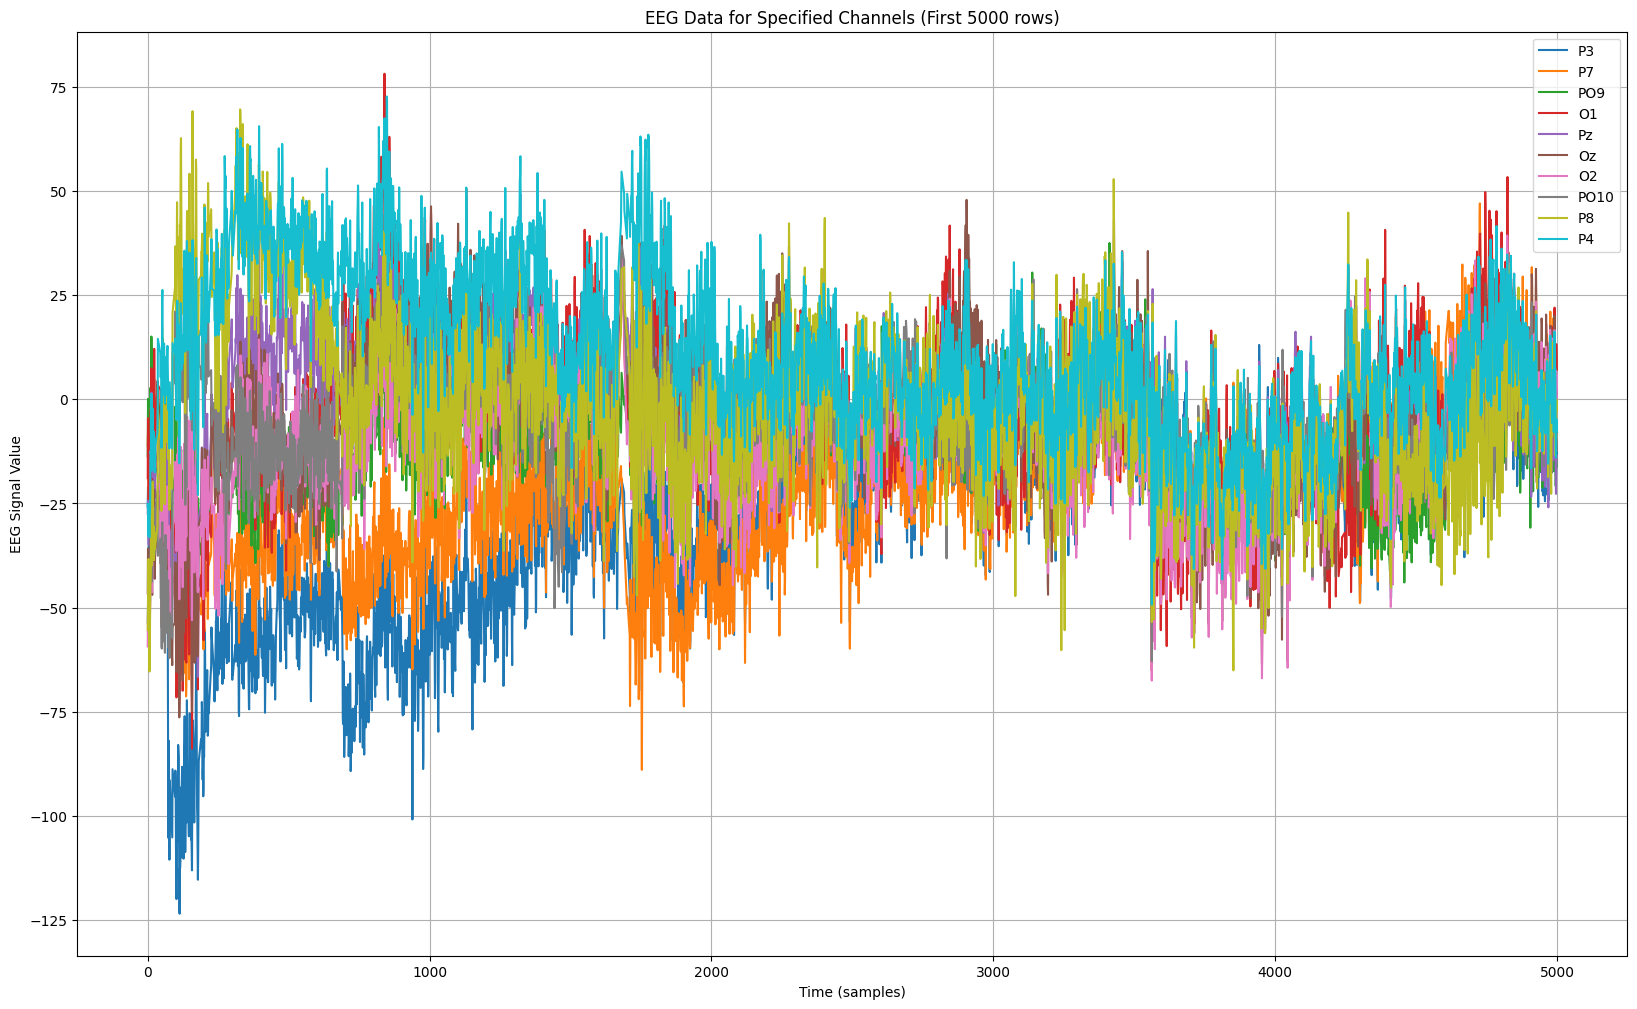

In [11]:
import matplotlib.pyplot as plt

# Channels to visualize
channels = ['P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4']

# Plotting the EEG data for the specified channels
plt.figure(figsize=(20, 12))

# Plot each channel
for channel in channels:
    plt.plot(eeg_data_combined[channel][:5000], label=channel)  # Plotting the first 5000 rows for clarity

plt.title('EEG Data for Specified Channels (First 5000 rows)')
plt.xlabel('Time (samples)')
plt.ylabel('EEG Signal Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


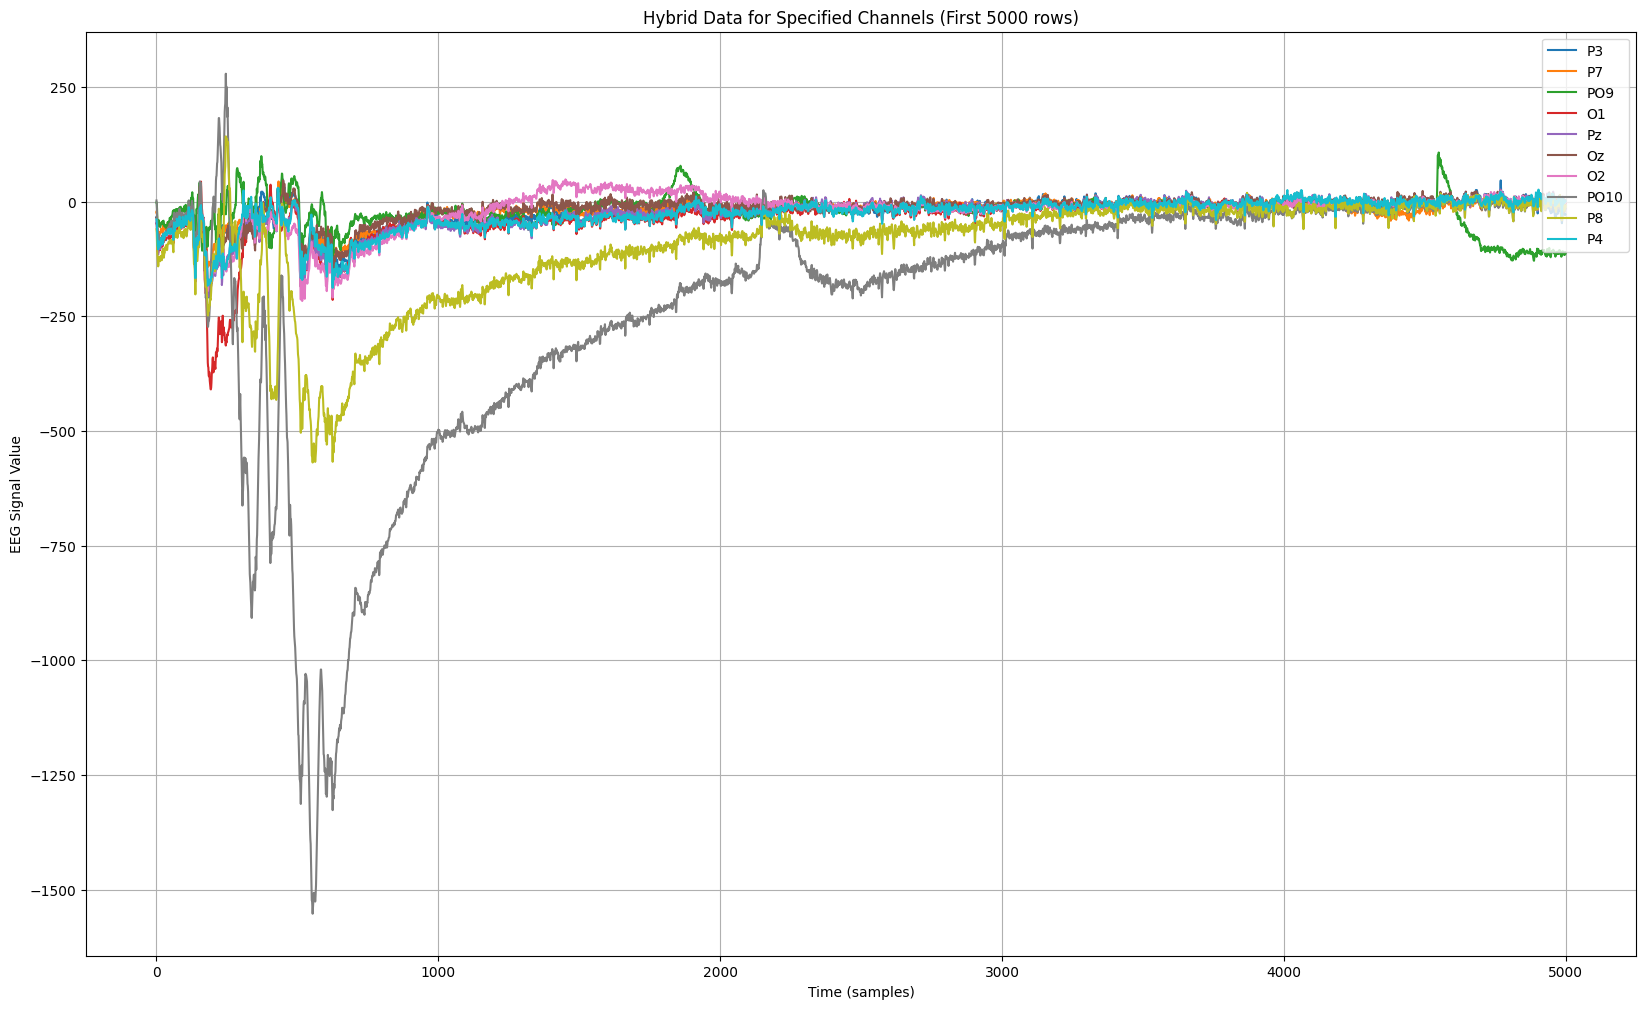

In [12]:
# Plotting the Hybrid data for the specified channels
plt.figure(figsize=(20, 12))

# Plot each channel
for channel in channels:
    plt.plot(hybrid_data_combined[channel][:5000], label=channel)  # Plotting the first 5000 rows for clarity

plt.title('Hybrid Data for Specified Channels (First 5000 rows)')
plt.xlabel('Time (samples)')
plt.ylabel('EEG Signal Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


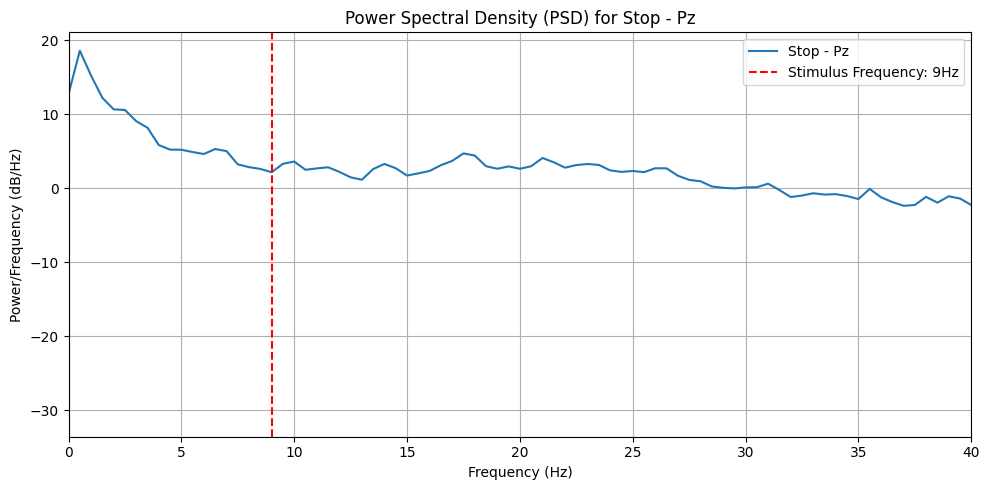

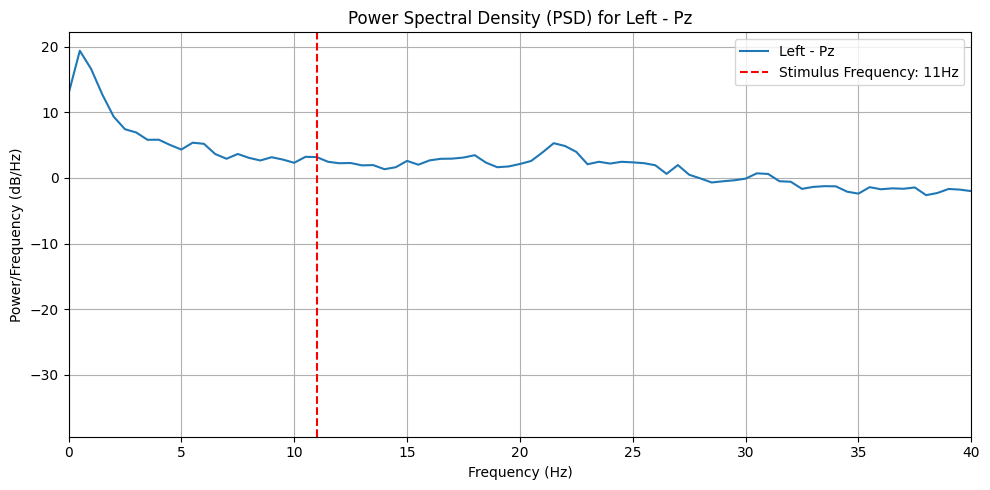

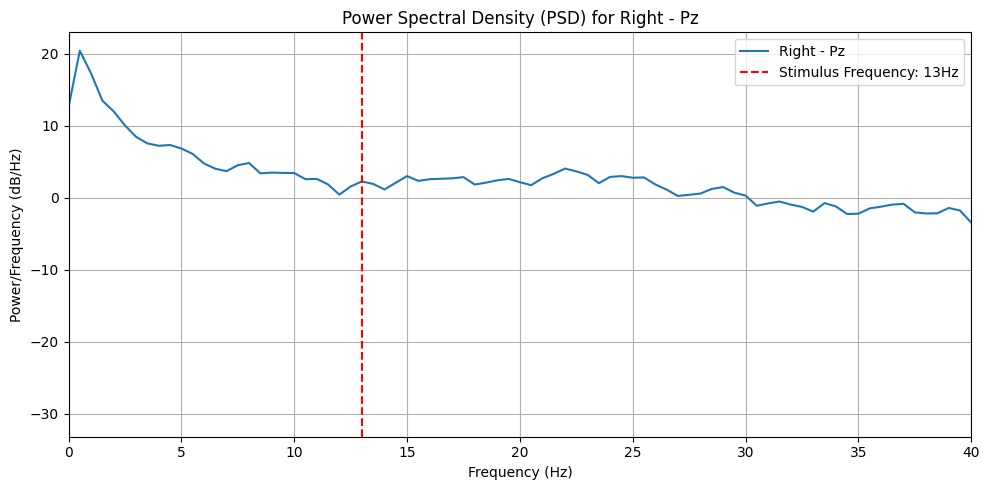

In [13]:
from scipy.signal import welch
import numpy as np

# Define the stimulus frequencies for each label
stimulus_freqs = {
    'Stop': 9,
    'Left': 11,
    'Right': 13
}

# Function to compute and plot PSD for a given label and dataset
def plot_psd_for_label(data, label, channel):
    # Filter data for the given label
    filtered_data = data[data['New Label'] == label]
    
    # Compute PSD
    frequencies, psd_values = welch(filtered_data[channel], fs=256, nperseg=512)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(frequencies, 10 * np.log10(psd_values), label=f'{label} - {channel}')
    plt.axvline(stimulus_freqs[label], color='red', linestyle='--', label=f'Stimulus Frequency: {stimulus_freqs[label]}Hz')
    plt.xlim([0, 40])  # Limiting to 40Hz for better visibility of our frequencies of interest
    plt.title(f'Power Spectral Density (PSD) for {label} - {channel}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the PSD for "Stop" label in EEG data
plot_psd_for_label(eeg_data_combined, 'Stop', 'Pz')
# Plot the PSD for "Left" label in EEG data
plot_psd_for_label(eeg_data_combined, 'Left', 'Pz')

# Plot the PSD for "Right" label in EEG data
plot_psd_for_label(eeg_data_combined, 'Right', 'Pz')



In [14]:
# Load the newly uploaded EEG data files
eeg_data_new_1 = pd.read_csv('profile\Oussama\eeg_data_20230705150601.csv')
eeg_data_new_2 = pd.read_csv('profile\Oussama\eeg_data_20230705151559.csv')
eeg_data_new_3 = pd.read_csv('profile\Oussama\eeg_data_20230705151932.csv')
eeg_data_new_4 = pd.read_csv('profile\Oussama\eeg_data_20230705152259.csv')
eeg_data_new_5 = pd.read_csv('profile\Oussama\eeg_data_20230728150927.csv')
eeg_data_new_6 = pd.read_csv('profile\Oussama\eeg_data_20230728151256.csv')
eeg_data_new_7 = pd.read_csv('profile\Oussama\eeg_data_20230728151642.csv')
eeg_data_new_8 = pd.read_csv('profile\Oussama\eeg_data_20230728152219.csv')
eeg_data_new_9 = pd.read_csv('profile\Oussama\eeg_data_20230728160419.csv')
eeg_data_new_10 = pd.read_csv('profile\Oussama\eeg_data_20230728160845.csv')


# Concatenate the new EEG data files
eeg_data_new_combined = pd.concat([eeg_data_new_1, eeg_data_new_2, eeg_data_new_3, 
                                  eeg_data_new_4, eeg_data_new_5, eeg_data_new_6, eeg_data_new_7, eeg_data_new_8, eeg_data_new_9,eeg_data_new_10], ignore_index=True)

# Check the shape of the combined dataset
eeg_data_new_combined.shape


(213718, 41)

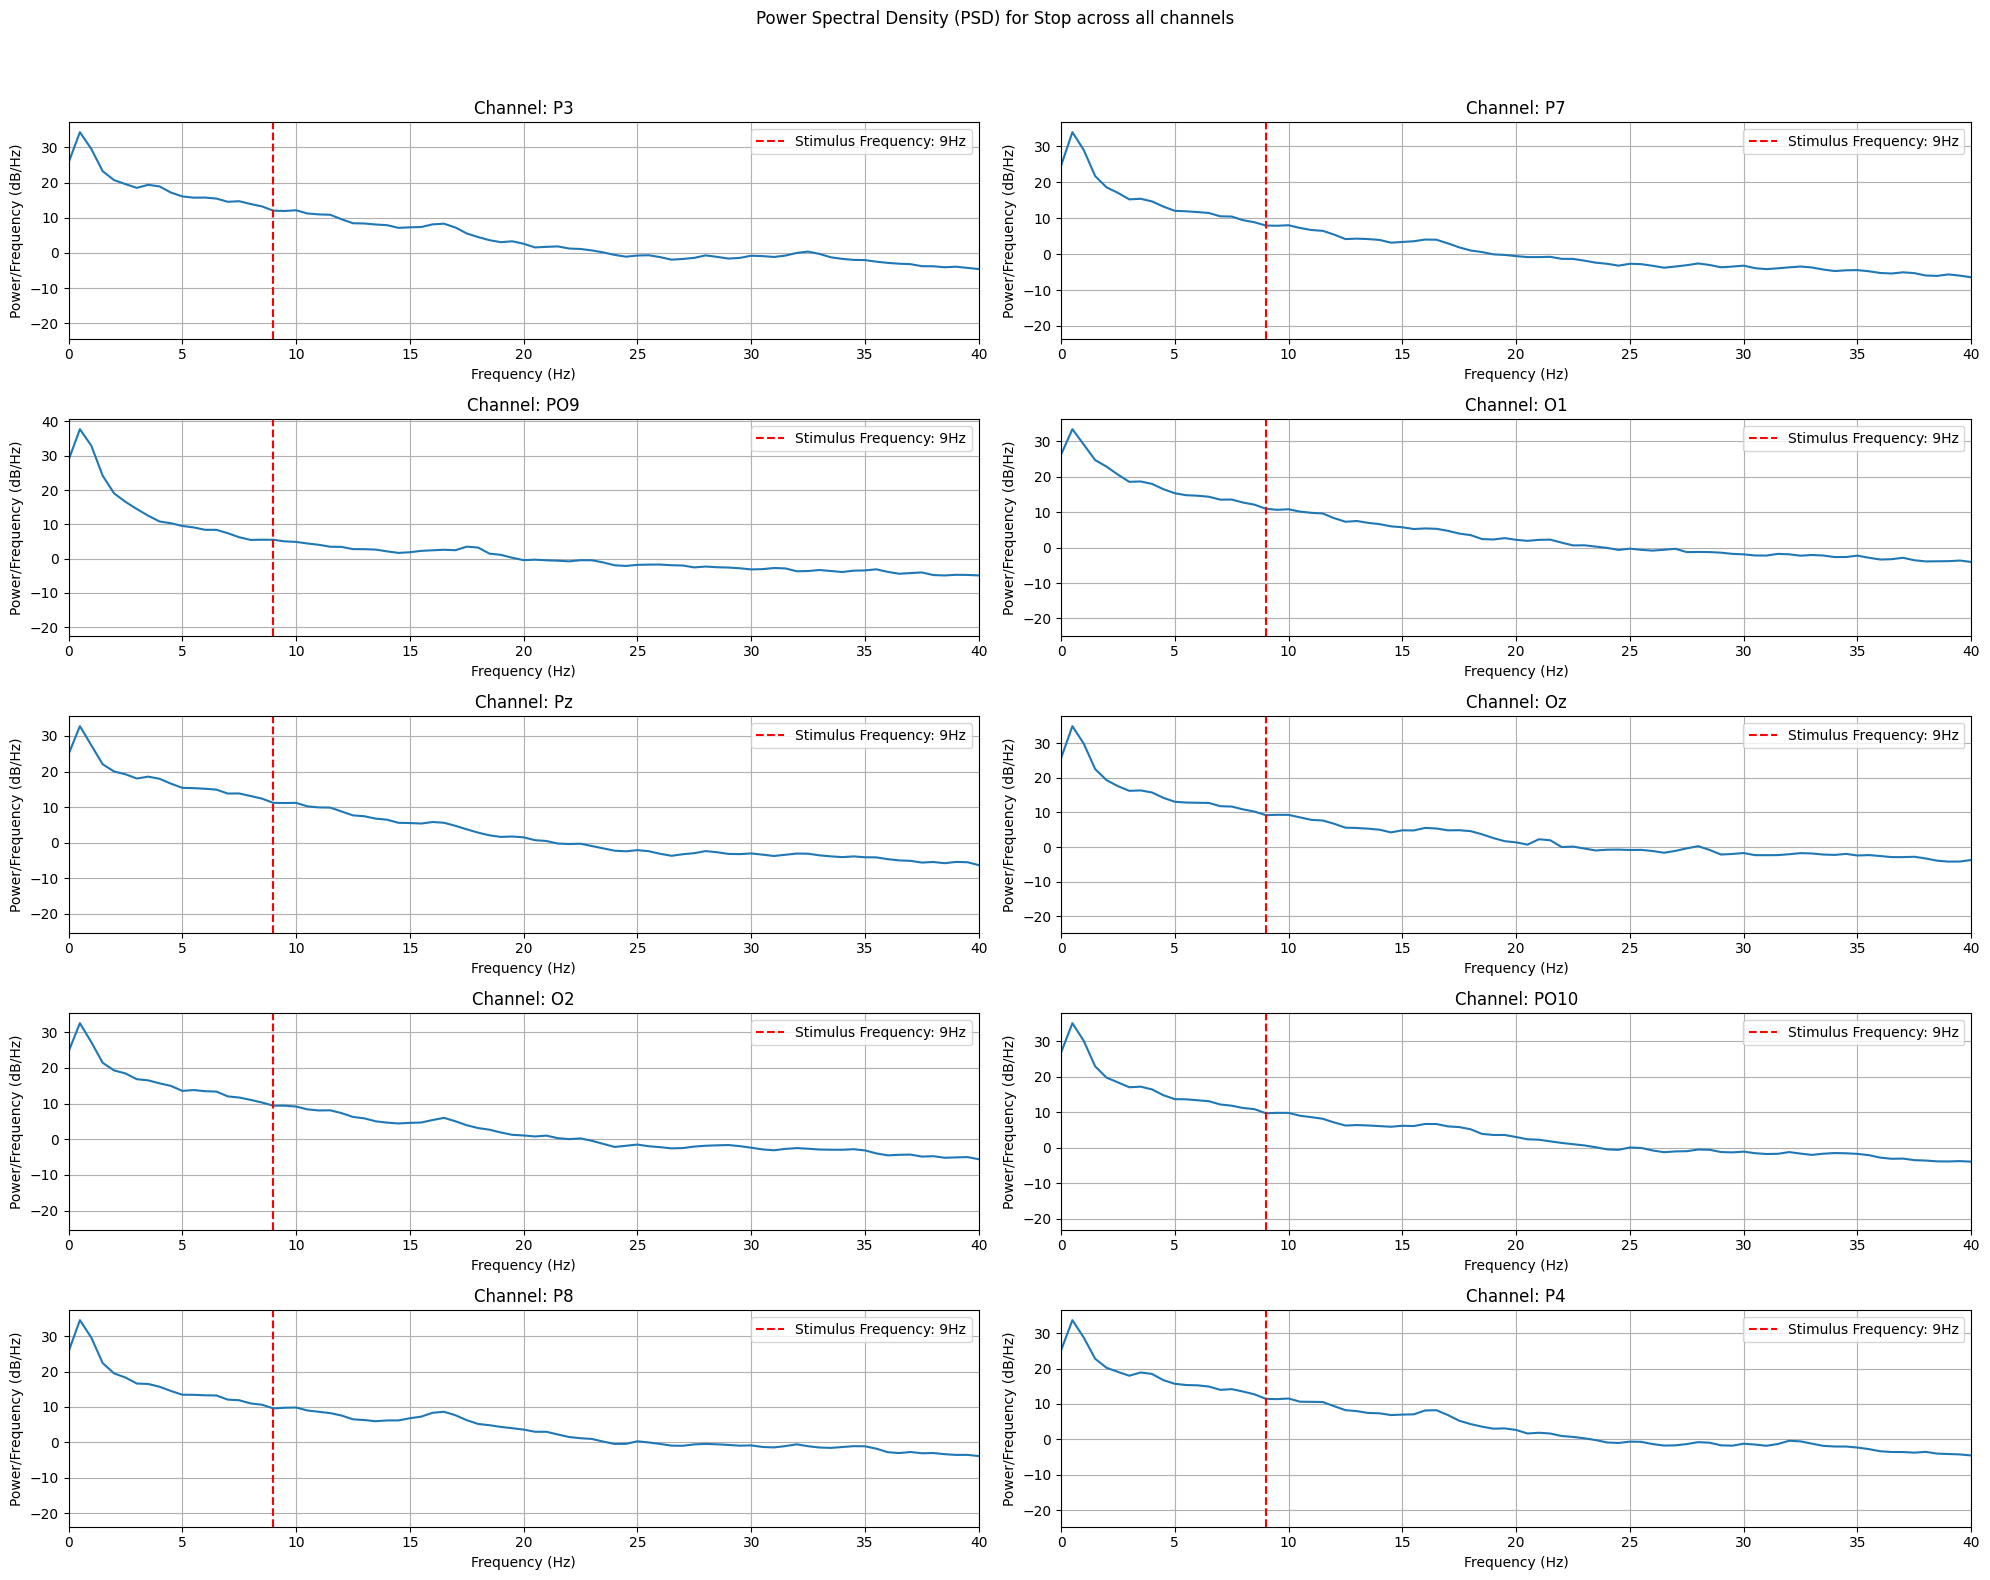

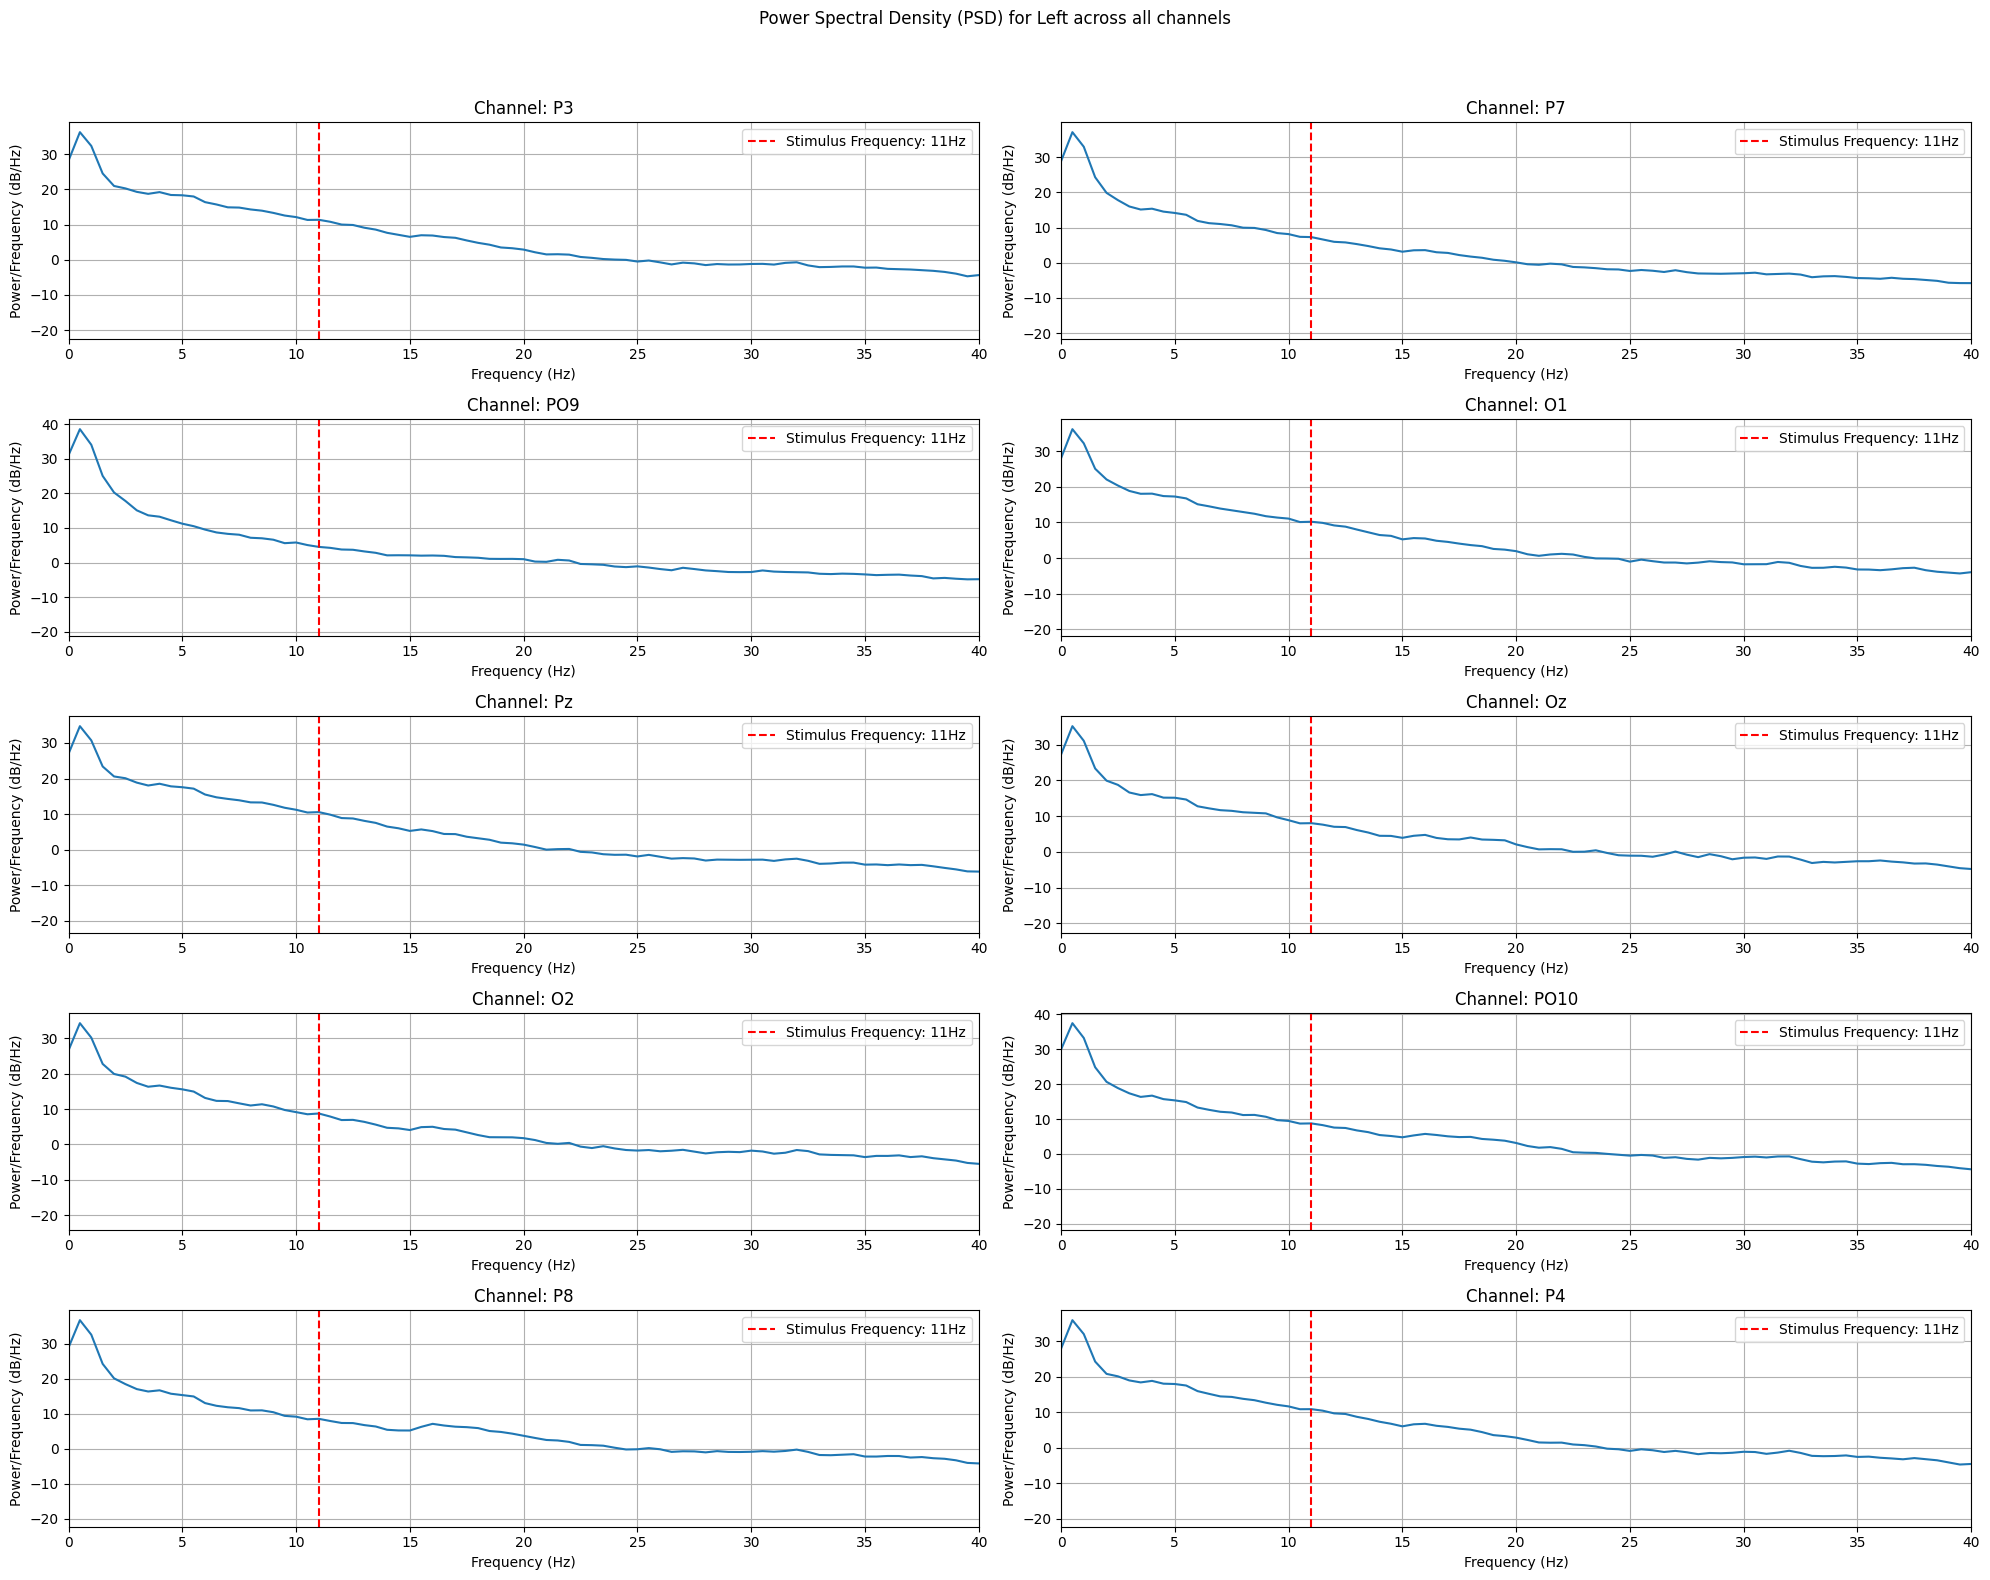

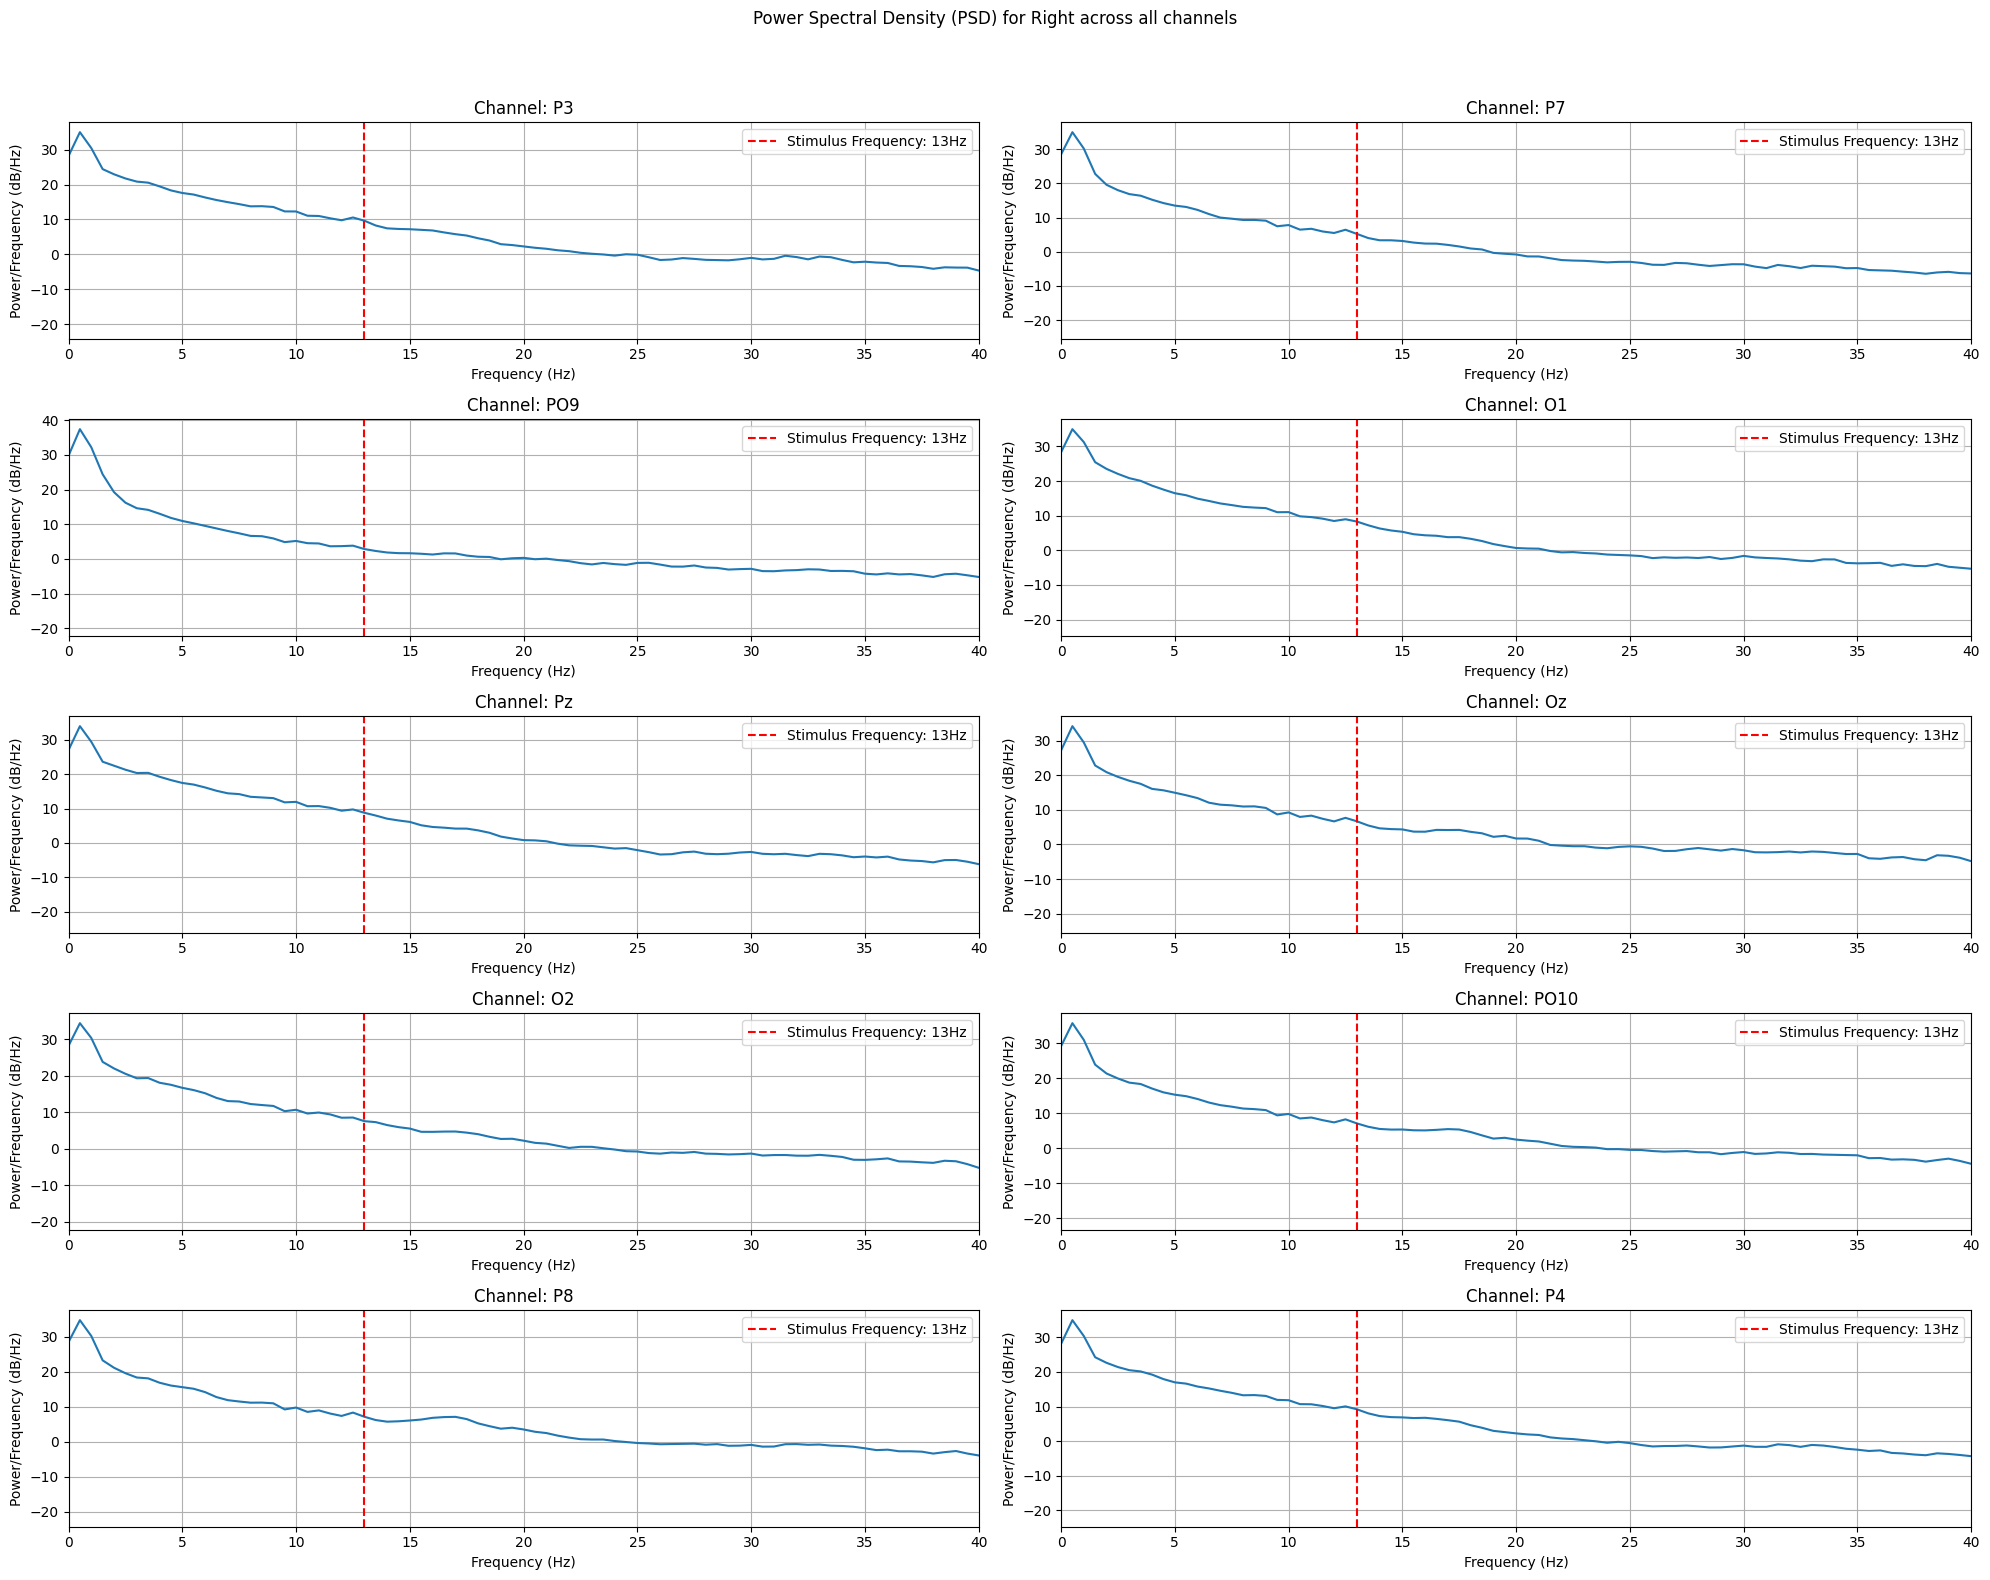

In [15]:
# Function to compute and plot PSD for all channels of a given label
def plot_psd_for_all_channels(data, label):
    plt.figure(figsize=(20, 15))
    
    # Iterate through each channel and plot its PSD
    for idx, channel in enumerate(channels, 1):
        plt.subplot(5, 2, idx)  # 5 rows and 2 columns of subplots
        filtered_data = data[data['New Label'] == label]
        frequencies, psd_values = welch(filtered_data[channel], fs=256, nperseg=512)
        plt.plot(frequencies, 10 * np.log10(psd_values))
        plt.axvline(stimulus_freqs[label], color='red', linestyle='--', label=f'Stimulus Frequency: {stimulus_freqs[label]}Hz')
        plt.xlim([0, 40])  # Limiting to 40Hz for better visibility of our frequencies of interest
        plt.title(f'Channel: {channel}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power/Frequency (dB/Hz)')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.suptitle(f'Power Spectral Density (PSD) for {label} across all channels', y=1.05)
    plt.show()

# Plot the PSD for "Stop" label across all channels
plot_psd_for_all_channels(eeg_data_new_combined, 'Stop')
# Plot the PSD for "Left" label across all channels
plot_psd_for_all_channels(eeg_data_new_combined, 'Left')

# Plot the PSD for "Right" label across all channels
plot_psd_for_all_channels(eeg_data_new_combined, 'Right')



In [16]:
# Define function to extract features from power spectrum
def extract_features(data, label, channel, fs=256):
    # Filter data for the given label
    filtered_data = data[data['New Label'] == label]
    
    # Compute power spectrum using Welch's method
    frequencies, psd_values = welch(filtered_data[channel], fs=fs, nperseg=512)
    
    # Extract peak amplitude at the stimulus frequency
    stimulus_freq = stimulus_freqs[label]
    peak_amplitude = psd_values[np.where(frequencies == stimulus_freq)][0] if stimulus_freq in frequencies else 0
    
    # Identify and extract harmonic peaks (up to 4 harmonics considered for simplicity)
    harmonic_peaks = []
    for i in range(2, 6):  # From 2nd to 5th harmonic
        harmonic_freq = stimulus_freq * i
        harmonic_amplitude = psd_values[np.where(frequencies == harmonic_freq)][0] if harmonic_freq in frequencies else 0
        harmonic_peaks.append(harmonic_amplitude)
    
    return peak_amplitude, harmonic_peaks

# Extract features for each channel and label
features_data = []

for channel in channels:
    for label in ['Stop', 'Left', 'Right']:
        peak_amplitude, harmonic_peaks = extract_features(eeg_data_new_combined, label, channel)
        features_data.append({
            'Channel': channel,
            'Label': label,
            'Peak Amplitude': peak_amplitude,
            '2nd Harmonic': harmonic_peaks[0],
            '3rd Harmonic': harmonic_peaks[1],
            '4th Harmonic': harmonic_peaks[2],
            '5th Harmonic': harmonic_peaks[3]
        })

# Convert to DataFrame for better visualization
features_df = pd.DataFrame(features_data)

features_df


,Channel,Label,Peak Amplitude,2nd Harmonic,3rd Harmonic,4th Harmonic,5th Harmonic
0,P3,Stop,15.898476,2.829141,0.674374,0.521583,0.330688
1,P3,Left,13.607480,1.392417,0.614361,0.364543,0.300355
2,P3,Right,9.177773,0.686611,0.416151,0.288045,0.253716
3,P7,Stop,6.197641,1.255839,0.450133,0.297517,0.236007
4,P7,Left,5.348720,0.899789,0.387802,0.281876,0.214086
5,P7,Right,3.320309,0.415961,0.257699,0.196810,0.180021
6,PO9,Stop,3.535387,2.098419,0.628425,0.410258,0.277633
7,PO9,Left,2.831342,1.145736,0.473908,0.350495,0.310803
8,PO9,Right,1.931484,0.689103,0.375158,0.265863,0.311357
9,O1,Stop,12.529477,2.255259,0.927178,0.461078,0.317497


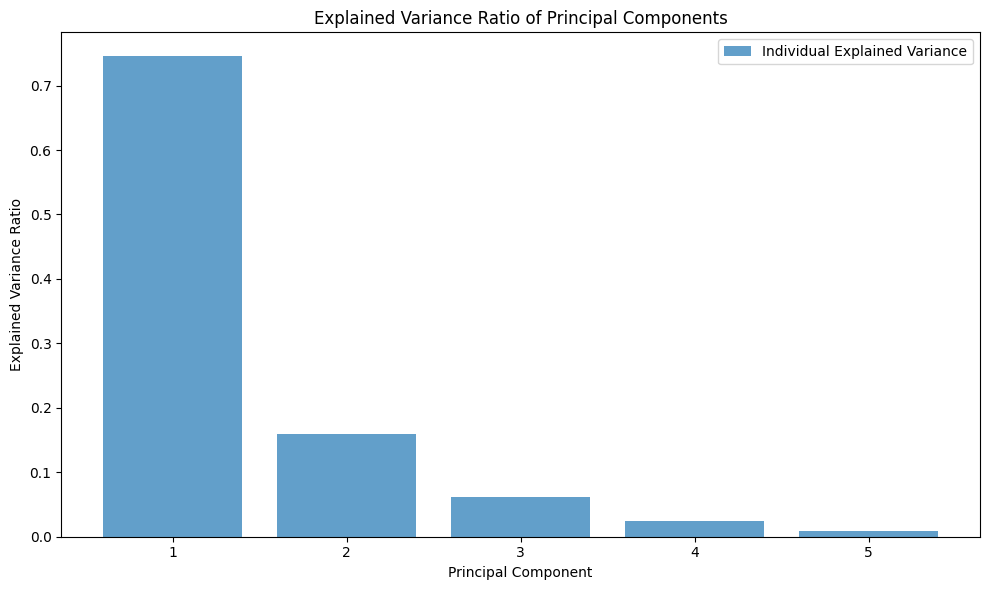

array([0.74535924, 0.90429177, 0.96604962, 0.99076258, 1.        ])

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Extract numerical features
numerical_features = ['Peak Amplitude', '2nd Harmonic', '3rd Harmonic', '4th Harmonic', '5th Harmonic']
X = features_df[numerical_features]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Calculate explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

explained_variance_ratio.cumsum()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Extract first three principal components
X_transformed = X_pca[:, :3]

# Extract labels
y = features_df['Label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')  # 'ovr' stands for one-vs-rest
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.6666666666666666,
 '              precision    recall  f1-score   support\n\n        Left       1.00      0.50      0.67         2\n       Right       0.50      1.00      0.67         2\n        Stop       1.00      0.50      0.67         2\n\n    accuracy                           0.67         6\n   macro avg       0.83      0.67      0.67         6\nweighted avg       0.83      0.67      0.67         6\n')

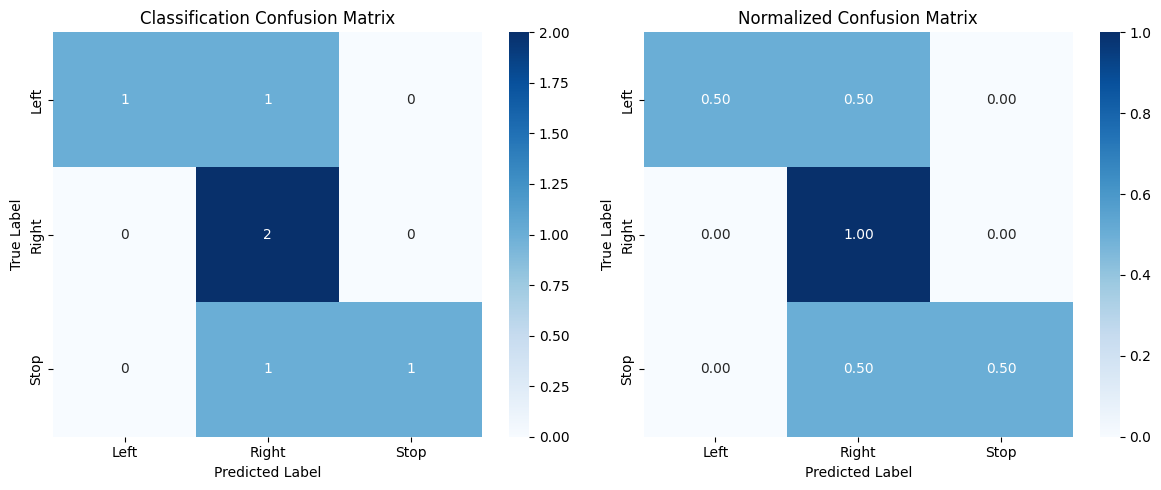

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]  # normalize

# Plotting confusion matrix
plt.figure(figsize=(12, 5))

# Classification confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Classification Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Normalized confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


In [20]:
# Determine the minimum class size
min_class_size = y.value_counts().min()

# Perform undersampling for each class
undersampled_data = []

for label in ['Stop', 'Left', 'Right']:
    label_data = features_df[features_df['Label'] == label]
    undersampled_data.append(label_data.sample(min_class_size, random_state=42))

# Combine the undersampled data
undersampled_df = pd.concat(undersampled_data, ignore_index=True)

# Check the class distribution after undersampling
class_distribution = undersampled_df['Label'].value_counts()

class_distribution


Label
Stop     10
Left     10
Right    10
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Features and target variable
X_undersampled = undersampled_df[numerical_features]
y_undersampled = undersampled_df['Label']

# Split data into training set and temporary set
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X_undersampled, y_undersampled, test_size=0.2, stratify=y_undersampled, random_state=42)

# Further split the temporary set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Perform stratified k-fold cross-validation on the training set
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(svm_classifier, X_train_temp, y_train_temp, cv=kfold, scoring='accuracy')

# Train the classifier on the entire training set and predict accuracy on the test set
svm_classifier.fit(X_train_temp, y_train_temp)
test_accuracy = svm_classifier.score(X_test, y_test)

cross_val_scores.mean(), test_accuracy


(0.79, 0.6666666666666666)

In [23]:
# SVM Model details
svm_model_details = svm_classifier.get_params()

# Compute normalized confusion matrix
conf_matrix_test = confusion_matrix(y_test, svm_classifier.predict(X_test))
normalized_conf_matrix_test = conf_matrix_test.astype('float') / conf_matrix_test.sum(axis=1)[:, np.newaxis]


svm_model_details


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}